In [1]:
# Import Dependencies
import seaborn as sns
import pandas as pd
import re
import numpy as np

In [2]:
# Read csv into pandas dataframe
wine_ratings_df = pd.read_csv("winemag-data.csv").drop(["Unnamed: 0"], axis=1)
wine_ratings_df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [3]:
# Return number of rows and columns for raw dataframe.
wine_ratings_df.shape

(129971, 13)

In [4]:
# Print summary info for all columns in dataframe.
wine_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [5]:
# Create list of titles to prepare for year extraction.
titles_list = list(wine_ratings_df["title"].values)
titles_list

['Nicosia 2013 Vulkà Bianco  (Etna)',
 'Quinta dos Avidagos 2011 Avidagos Red (Douro)',
 'Rainstorm 2013 Pinot Gris (Willamette Valley)',
 'St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore)',
 "Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley)",
 'Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra)',
 'Terre di Giurfo 2013 Belsito Frappato (Vittoria)',
 'Trimbach 2012 Gewurztraminer (Alsace)',
 'Heinz Eifel 2013 Shine Gewürztraminer (Rheinhessen)',
 'Jean-Baptiste Adam 2012 Les Natures Pinot Gris (Alsace)',
 'Kirkland Signature 2011 Mountain Cuvée Cabernet Sauvignon (Napa Valley)',
 'Leon Beyer 2012 Gewurztraminer (Alsace)',
 'Louis M. Martini 2012 Cabernet Sauvignon (Alexander Valley)',
 'Masseria Setteporte 2012 Rosso  (Etna)',
 'Mirassou 2012 Chardonnay (Central Coast)',
 'Richard Böcking 2013 Devon Riesling (Mosel)',
 'Felix Lavaque 2010 Felix Malbec (Cafayate)',
 'Gaucho Andino 2011 Winemaker Selection Malbec (Mendoza)',
 'Prad

In [6]:
# loop through titles and store years from 21st century to list.
years = []
for i, title in enumerate(titles_list):
    try:
        year = re.search(r"\b(20)\d{2}\b", title).group(0)
        years.append(year)
    except:
        years.append(np.NaN)
print(years)

['2013', '2011', '2013', '2013', '2012', '2011', '2013', '2012', '2013', '2012', '2011', '2012', '2012', '2012', '2012', '2013', '2010', '2011', '2010', '2012', '2012', '2013', '2007', '2011', '2009', '2011', '2013', '2013', '2011', '2010', '2012', '2010', '2011', '2010', '2011', '2010', '2011', '2010', '2011', '2011', '2011', '2009', '2012', '2011', '2011', '2010', '2011', '2011', '2011', '2011', '2008', '2008', '2010', '2011', '2010', '2010', '2010', '2011', '2011', '2014', '2013', '2015', '2014', nan, '2015', '2015', '2015', '2013', '2014', nan, '2014', '2013', '2013', '2013', '2012', '2013', '2015', '2016', '2015', '2014', '2014', '2014', '2016', '2016', '2014', '2015', '2016', '2014', '2014', '2015', '2014', '2015', '2013', '2015', '2014', '2015', '2015', '2015', '2010', '2013', '2015', '2014', '2014', '2015', '2014', '2015', '2014', '2015', '2014', '2014', '2015', '2013', '2014', '2015', '2012', '2013', '2013', '2014', '2013', '2004', '2003', '2007', '2007', '2006', '2006', '2003

In [7]:
# Add extracted year column to dataframe.
wine_ratings_df["year"] = years
wine_ratings_df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),2013
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,2004
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,2013
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,2012


In [8]:
# Print summary info for all columns in revised dataframe.
wine_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
 13  year                   123626 non-null  object 
dtypes: float64(1), int64(1), object(12)


In [9]:
# Replace null values in region_1 column with province name.
wine_ratings_df['region_1'].fillna(wine_ratings_df['province'], inplace=True)
wine_ratings_df.head(10)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Douro,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,2013
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,2012
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,Rheinhessen,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel,2013
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,2012


In [10]:
# Replace null values in region_2 column with region_1 name.
wine_ratings_df['region_2'].fillna(wine_ratings_df['region_1'], inplace=True)
wine_ratings_df.head(10)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Douro,Douro,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Lake Michigan Shore,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Navarra,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,Vittoria,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,2013
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,Alsace,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,2012
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,Rheinhessen,Rheinhessen,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel,2013
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,Alsace,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,2012


In [11]:
# Print summary info for all columns in revised dataframe.
wine_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               129908 non-null  object 
 7   region_2               129908 non-null  object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
 13  year                   123626 non-null  object 
dtypes: float64(1), int64(1), object(12)


In [12]:
# Print number of wines for each year, sorted from newer to older.
wine_ratings_df['year'].value_counts().sort_index(ascending=False)

2017       11
2016     3691
2015    10052
2014    15582
2013    15875
2012    15747
2011    12558
2010    12167
2009     9878
2008     7439
2007     7053
2006     5772
2005     3613
2004     1774
2003      598
2002      366
2001      691
2000      759
Name: year, dtype: int64

In [13]:
# check stats for year column.
wine_ratings_df['year'].describe()

count     123626
unique        18
top         2013
freq       15875
Name: year, dtype: object

In [14]:
# create new dataframe with only the columns we want to keep.
selected_columns = ['country', 'points', 'price', 'province','region_1', 
                    'region_2', 'taster_name', 'title', 'variety', 'winery', 'year']
wine_ratings_df = wine_ratings_df[selected_columns]
wine_ratings_df

,country,points,price,province,region_1,region_2,taster_name,title,variety,winery,year
0,Italy,87,NaN,Sicily & Sardinia,Etna,Etna,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013
1,Portugal,87,15.0,Douro,Douro,Douro,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,US,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,US,87,13.0,Michigan,Lake Michigan Shore,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,US,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,90,28.0,Mosel,Mosel,Mosel,Anna Lee C. Iijima,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),2013
129967,US,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,2004
129968,France,90,30.0,Alsace,Alsace,Alsace,Roger Voss,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,2013
129969,France,90,32.0,Alsace,Alsace,Alsace,Roger Voss,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,2012


In [15]:
# Create function to display info for null values in dataframe.
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [16]:
# Call function to display null values in dataframe.
missing_values_table(wine_ratings_df)

Your selected dataframe has 11 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
taster_name,26244,20.2
price,8996,6.9
year,6345,4.9
country,63,0.0
province,63,0.0
region_1,63,0.0
region_2,63,0.0
variety,1,0.0


In [17]:
# Drop all rows with null values and renumber index.
wine_ratings_df = wine_ratings_df.dropna().reset_index(drop=True)
wine_ratings_df

,country,points,price,province,region_1,region_2,taster_name,title,variety,winery,year
0,Portugal,87,15.0,Douro,Douro,Douro,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
1,US,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
2,US,87,13.0,Michigan,Lake Michigan Shore,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
3,US,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
4,Spain,87,15.0,Northern Spain,Navarra,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011
...,...,...,...,...,...,...,...,...,...,...,...
92437,Germany,90,28.0,Mosel,Mosel,Mosel,Anna Lee C. Iijima,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),2013
92438,US,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,2004
92439,France,90,30.0,Alsace,Alsace,Alsace,Roger Voss,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,2013
92440,France,90,32.0,Alsace,Alsace,Alsace,Roger Voss,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,2012


In [18]:
# Print counts of wines by country. 
wine_ratings_df['country'].value_counts()

US                        36609
France                    16032
Italy                      9725
Spain                      5979
Portugal                   4589
Chile                      4245
Argentina                  3710
Austria                    2753
Germany                    2073
Australia                  1910
New Zealand                1258
South Africa               1200
Israel                      483
Greece                      440
Canada                      244
Bulgaria                    141
Hungary                     136
Romania                     120
Uruguay                     108
Turkey                       90
Georgia                      81
Slovenia                     78
Croatia                      70
Mexico                       65
Moldova                      57
England                      55
Brazil                       38
Lebanon                      34
Morocco                      28
Peru                         16
Serbia                       12
Macedoni

In [19]:
# Print ratings by number of times they appear in dataset and sort from highest to lowest. 
wine_ratings_df['points'].value_counts().sort_index(ascending=False)

100       13
99        15
98        49
97       137
96       353
95      1069
94      2674
93      4774
92      6992
91      8819
90     11641
89      9458
88     12820
87     11451
86      8544
85      6341
84      3861
83      1862
82       923
81       397
80       249
Name: points, dtype: int64

In [20]:
# Check simple stats for dataset.
wine_ratings_df.describe()

,points,price
count,92442.000000,92442.000000
mean,88.614493,34.879979
std,2.945965,42.723110
min,80.000000,4.000000
25%,87.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,40.000000
max,100.000000,3300.000000


In [21]:
# Print top 25 provinces that show up most often in dataset.
wine_ratings_df['province'].value_counts().head(25)

California            19616
Washington             8431
Oregon                 5176
Bordeaux               3973
Northern Spain         3737
Tuscany                3199
Mendoza Province       3186
Burgundy               3026
New York               2477
Piedmont               2107
Alsace                 1829
Loire Valley           1510
Southwest France       1325
Northeastern Italy     1174
South Australia        1147
Douro                  1127
Provence               1116
Mosel                  1000
Rhône Valley            996
Veneto                  861
Beaujolais              846
Alentejano              821
Sicily & Sardinia       821
Catalonia               809
Colchagua Valley        801
Name: province, dtype: int64

In [22]:
# Print counts of wines by grape variety that show up more than 300 times in dataset. 
wine_ratings_df['variety'].value_counts()[wine_ratings_df['variety'].value_counts()> 300]

Pinot Noir                    9606
Chardonnay                    7983
Red Blend                     6674
Cabernet Sauvignon            6127
Bordeaux-style Red Blend      4790
Riesling                      4684
Sauvignon Blanc               3828
Syrah                         3086
Rosé                          3000
Malbec                        2515
Portuguese Red                2191
Merlot                        2024
Sangiovese                    1760
Nebbiolo                      1755
Tempranillo                   1715
White Blend                   1580
Zinfandel                     1471
Pinot Gris                    1260
Rhône-style Red Blend         1209
Grüner Veltliner              1134
Cabernet Franc                1073
Portuguese White               979
Gamay                          832
Gewürztraminer                 829
Viognier                       759
Shiraz                         694
Sparkling Blend                685
Bordeaux-style White Blend     675
Tempranillo Blend   

In [23]:
# Print counts of wines by year produced.
wine_ratings_df['year'].value_counts()

2013    15153
2014    14860
2012    13692
2015     9548
2011     9072
2010     7632
2009     5780
2008     3916
2016     3511
2007     3267
2006     2524
2005     1616
2004      686
2000      344
2001      341
2003      251
2002      238
2017       11
Name: year, dtype: int64

In [24]:
# Print numbers of wines the tasters tested.
wine_ratings_df['taster_name'].value_counts()

Roger Voss            18659
Michael Schachner     14207
Kerin O’Keefe          9567
Virginie Boone         9401
Paul Gregutt           9137
Matt Kettmann          6203
Sean P. Sullivan       4873
Joe Czerwinski         4725
Anna Lee C. Iijima     4284
Jim Gordon             4010
Anne Krebiehl MW       3186
Lauren Buzzeo          1671
Susan Kostrzewa        1024
Mike DeSimone           490
Jeff Jenssen            453
Alexander Peartree      393
Carrie Dykes            132
Fiona Adams              22
Christina Pickard         5
Name: taster_name, dtype: int64

In [25]:
# Show mean of rating and price broken down by country.
wine_ratings_df.groupby(['country']).mean()

,points,price
country,,
Argentina,86.733693,24.525337
Armenia,87.500000,14.500000
Australia,88.867016,37.361257
Austria,90.225935,30.705049
Bosnia and Herzegovina,86.500000,12.500000
Brazil,84.394737,23.631579
Bulgaria,87.936170,14.645390
Canada,89.430328,35.344262
Chile,86.536160,20.887868


In [26]:
# Show top 10 grape varieties.
wine_ratings_df['variety'].value_counts().nlargest(10)

Pinot Noir                  9606
Chardonnay                  7983
Red Blend                   6674
Cabernet Sauvignon          6127
Bordeaux-style Red Blend    4790
Riesling                    4684
Sauvignon Blanc             3828
Syrah                       3086
Rosé                        3000
Malbec                      2515
Name: variety, dtype: int64

In [27]:
# Show top 20 grape varieties by highest average rating, along with average price. 
variety_ratings = wine_ratings_df.groupby(['variety']).mean()
variety_ratings.sort_values('points', ascending=False).head(20)

,points,price
variety,,
Tinta del Pais,95.000000,47.500000
Gelber Traminer,95.000000,35.000000
Chardonnay Weissburgunder,94.000000,58.000000
Riesling-Chardonnay,94.000000,40.000000
Sercial,94.000000,50.000000
Bual,93.250000,44.000000
Roviello,93.000000,28.000000
Blauburgunder,93.000000,19.000000
Trousseau Gris,93.000000,26.000000


In [28]:
# Show top 20 growing provinces by highest average rating, along with average price.
best_prov_ratings = wine_ratings_df.groupby(['province']).mean()
best_prov_ratings.sort_values('points', ascending=False).head(20)

,points,price
province,,
Südburgenland,94.000000,57.000000
Madeira,93.400000,45.200000
Champagne,92.505181,112.567358
Mittelrhein,92.250000,30.500000
Retsina,92.000000,20.000000
Puente Alto,91.769231,84.307692
England,91.709091,52.400000
Wachau,91.671010,45.824104
Santa Cruz,91.500000,77.500000


In [29]:
# Show bottom 20 growing provinces by lowest average rating, along with average price.
worst_prov_ratings = wine_ratings_df.groupby(['province']).mean()
worst_prov_ratings.sort_values('points', ascending=True).head(20)

,points,price
province,,
Serra do Sudeste,82.000000,15.000000
Middle and South Dalmatia,82.000000,65.000000
New Jersey,82.800000,23.400000
Ticino,83.000000,38.000000
Campanha,83.000000,26.000000
Santa Catarina,83.000000,31.000000
Kentucky,83.000000,35.000000
Vale dos Vinhedos,83.250000,33.250000
Cahul,83.333333,8.000000


In [30]:
# Check data types.
wine_ratings_df.dtypes

country         object
points           int64
price          float64
province        object
region_1        object
region_2        object
taster_name     object
title           object
variety         object
winery          object
year            object
dtype: object

In [31]:
# Convert year data type to integer.
wine_ratings_df["year"] = wine_ratings_df["year"].astype(int)
wine_ratings_df.head()

,country,points,price,province,region_1,region_2,taster_name,title,variety,winery,year
0,Portugal,87,15.0,Douro,Douro,Douro,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
1,US,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
2,US,87,13.0,Michigan,Lake Michigan Shore,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
3,US,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
4,Spain,87,15.0,Northern Spain,Navarra,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011


In [32]:
# Double check data types again.
wine_ratings_df.dtypes

country         object
points           int64
price          float64
province        object
region_1        object
region_2        object
taster_name     object
title           object
variety         object
winery          object
year             int32
dtype: object

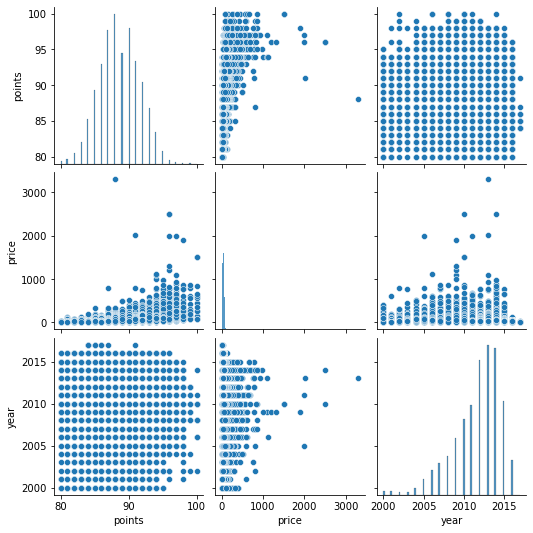

In [33]:
# Create pairplot to visualize relationships between price, points, and year features.
sns.pairplot(wine_ratings_df)

<AxesSubplot:xlabel='country', ylabel='points'>

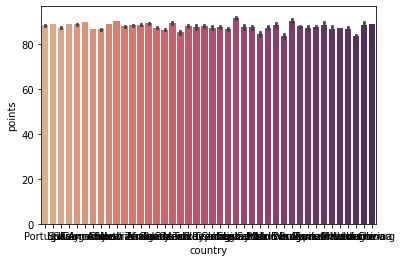

In [35]:
# Create bar plot of wine ratings by country.
sns.barplot(x='country', y='points', data=wine_ratings_df, palette='flare')